<font size="6">**Stationarity**</font>

In [1]:

import numpy as np
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%run ../nb_config.py

running notebook configuration


In [4]:
from src.load_data import market_data
from src.mle import time_series as mle_ts
from src import utils

# Parameters

In [5]:
TAU_TARGET = 5

# Load Data

In [6]:
comm_df = market_data.read_mkt_data()[['brent']]

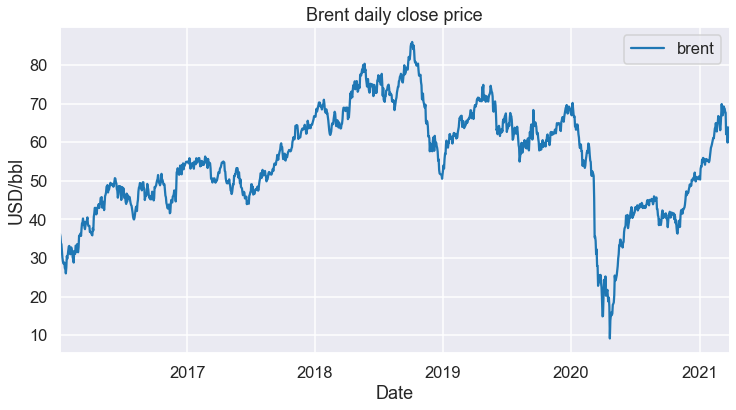

In [7]:
comm_df.plot(title='Brent daily close price')
plt.ylabel("USD/bbl")
plt.show()

In [8]:
target = mle_ts.get_targets(y=comm_df[['brent']], tau=TAU_TARGET)

In [9]:
target_adf_res = mle_ts.run_adf_test(target)
target_adf_res

,adf,pvalue
brent,-6.0703,0.0000


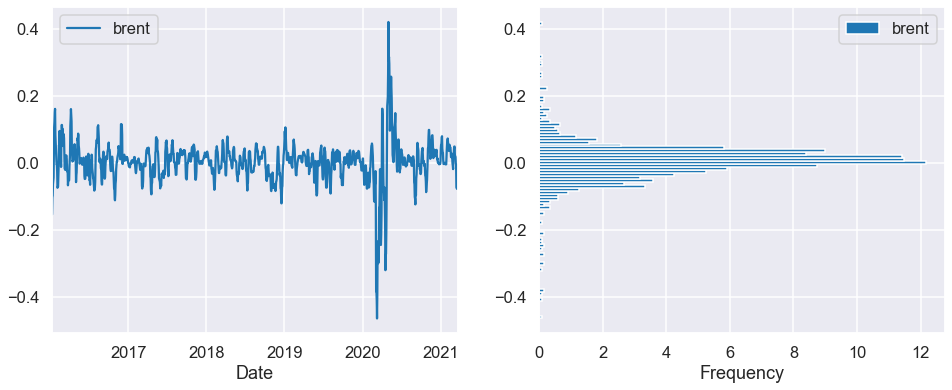

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

ax = axs[0]
target.plot(ax=ax)
ax = axs[1]
target.plot.hist(ax=ax, bins=100, orientation='horizontal', density=True)
plt.show()

In [11]:
from statsmodels.stats.diagnostic import kstest_normal

In [12]:
kstest_normal(target)

(0.9999999999999856, 0.0009999999999998899)

In [13]:
target.kurtosis()

brent   12.8609
dtype: float64

In [14]:
target.skew()

brent   -0.9996
dtype: float64